# Entree Task: Implementing Your Own Neural Networks from Scratch

In [1]:
import math
import numpy as np
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt

## Task 1: Linear Layer 
Implement the forward and backward functions for a linear layer. Please read the requirement details for Task 1 in the code comment and in the pdf document.

In [2]:
class LinearLayer:
    def __init__(self, _m, _n):
        '''
        :param _m: _m is the input X hidden size
        :param _n: _n is the output Y hidden size
        '''
        # "Kaiming initialization" is important for neural network to converge. The NN will not converge without it!
        self.W = (np.random.uniform(low=-10000.0, high=10000.0, size = (_m, _n)))/10000.0*np.sqrt(6.0/ _m)
        self.stored_X = None
        self.W_grad = None #record the gradient of the weight

    def forward(self, X):
        '''
        :param X: shape(X)[0] is batch size and shape(X)[1] is the #features
         (1) Store the input X in stored_data for Backward.
         (2) :return: X * weights
        '''
        
        ########## Code start  ##########
        # store the input matrix
        self.stored_X = X
        
        # Calculate the ouput matrix using the weights and then return this matrix
        Y = X @ self.W
        return Y
        ##########  Code end   ##########
    
    def backward(self, Y_grad):
        '''
        /* shape(output_grad)[0] is batch size and shape(output_grad)[1] is the # output features (shape(weight)[1])
         * 1) Calculate the gradient of the output (the result of the Forward method) w.r.t. the **W** and store the product of the gradient and Y_grad in W_grad
         * 2) Calculate the gradient of the output (the result of the Forward method) w.r.t. the **X** and return the product of the gradient and Y_grad
         */
        '''
        
        ########## Code start  ##########
        # Store the gradient of Loss wrt the weights
        self.W_grad = (self.stored_X.T) @ Y_grad
        
        # Return the gradient of Loss wrt the input of the forward function
        return (Y_grad @ (self.W.T))
        ##########  Code end   ##########

## Checkpoint 1: Linear Layer
Check your linear forward and backward function implementations with numerical derivatives.


In [3]:
#gradient check
import copy
#Random test
n = 3
m = 6
Y_grad = np.random.rand(1, m)
test_vector = np.random.rand(1, n)
DELTA = 1e-6
test_layer = LinearLayer(n, m)

test_layer_1 = copy.deepcopy(test_layer)
test_layer_2 = copy.deepcopy(test_layer)

test_layer.forward(test_vector)
Your_backward = test_layer.backward(Y_grad)

cal_gradient = np.zeros((np.shape(test_vector)[0], np.shape(test_vector)[1]))
for t_p in range(np.shape(test_vector)[0]):
    for i in range(np.shape(test_vector)[1]):
        test_vector_1 = copy.deepcopy(test_vector)
        test_vector_2 = copy.deepcopy(test_vector)
        test_vector_1[t_p][i] = test_vector_1[t_p][i] + DELTA
        test_vector_2[t_p][i] = test_vector_2[t_p][i] - DELTA

        cal_gradient[t_p][i] = np.sum(
            (np.dot(Y_grad, np.transpose(test_layer_1.forward(test_vector_1) - test_layer_2.forward(test_vector_2))/(2*DELTA))))


print('Your gradient: ',Your_backward)
print('Numerical gradient:',cal_gradient)
print('Error: ',abs(np.sum(Your_backward - cal_gradient)))
if abs(np.sum(Your_backward - cal_gradient)) < 1e-4:
    print('Correct backward. Congratulations!')
else:
    print('Wrong backawrd. Please check your implementation again.')

Your gradient:  [[-0.68382926 -1.14948423  0.90621599]]
Numerical gradient: [[-0.68382926 -1.14948423  0.90621599]]
Error:  3.4144242988531914e-11
Correct backward. Congratulations!


## Task 2: Non-Linear Activation
Implement the forward and backward functions for a nonlinear layer. Please read the requirement details for Task 2 in the code comment and in the pdf document.

In [4]:
class ReLU:
    #sigmoid layer
    def __init__(self):
        self.stored_X = None # Here we should store the input matrix X for Backward

    def forward(self, X):
        '''
        /*
         *  The input X matrix has the dimension [#samples, #features].
         *  The output Y matrix has the same dimension as the input X.
         *  You need to perform ReLU on each element of the input matrix to calculate the output matrix.
         *  TODO: 1) Create an output matrix by going through each element in input and calculate relu=max(0,x) and
         *  TODO: 2) Store the input X in self.stored_X for Backward.
         */
        '''
        
        ########## Code start  ##########
        # Store the input for use in the backward step
        self.stored_X = X
        
        # create a matrix to store the output
        Y = np.zeros((X.shape[0], X.shape[1]))
        
        # For every element in the input matrix
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                # Run the ReLU function on the element and store the output in the output matrix
                Y[i, j] = max(0, X[i, j])
        
        # Return the output matrix
        return Y
        ##########  Code end   ##########

    def backward(self, Y_grad):
        '''
         /*  grad_relu(x)=1 if relu(x)=x
         *  grad_relu(x)=0 if relu(x)=0
         *
         *  The input matrix has the name "output_grad." The name is confusing (it is actually the input of the function). But the name follows the convension in PyTorch.
         *  The output matrix has the same dimension as input.
         *  The output matrix is calculated as grad_relu(stored_X)*Y_grad.
         *  TODO: returns the output matrix calculated above
         */
        '''
        
        ########## Code start  ##########
        # Create a matrix to store the gradient of the Loss wrt X
        X_grad = np.zeros((Y_grad.shape[0], Y_grad.shape[1]))
        
        # For every element in X
        for i in range(self.stored_X.shape[0]):
            for j in range(self.stored_X.shape[1]):
                
                # If the value of the element is greater than 0
                if self.stored_X[i, j] > 0:
                    # Set the value of X_grad to be the same as Y_grad at that position in the matrix
                    X_grad[i, j] = Y_grad[i, j]
        
        # Return the gradient of the Loss wrt X
        return X_grad
        ##########  Code end   ##########

## Checkpoint 2: ReLU 
Check your ReLU forward and backward functions 

In [5]:
#gradient check
import copy
#Random test
n = 3
Y_grad = np.random.rand(1, n)
test_vector = np.random.rand(1, n)
DELTA = 1e-6
test_layer = ReLU()

test_layer_1 = copy.deepcopy(test_layer)
test_layer_2 = copy.deepcopy(test_layer)

test_layer.forward(test_vector)
Your_backward = test_layer.backward(Y_grad)

cal_gradient = np.zeros((np.shape(test_vector)[0], np.shape(test_vector)[1]))
for t_p in range(np.shape(test_vector)[0]):
    for i in range(np.shape(test_vector)[1]):
        test_vector_1 = copy.deepcopy(test_vector)
        test_vector_2 = copy.deepcopy(test_vector)
        test_vector_1[t_p][i] = test_vector_1[t_p][i] + DELTA
        test_vector_2[t_p][i] = test_vector_2[t_p][i] - DELTA

        cal_gradient[t_p][i] = np.sum(
            (np.dot(Y_grad, np.transpose(test_layer_1.forward(test_vector_1) - test_layer_2.forward(test_vector_2))/(2*DELTA))))


print('Your gradient: ',Your_backward)
print('Numerical gradient:',cal_gradient)
print('Error: ',abs(np.sum(Your_backward - cal_gradient)))
if abs(np.sum(Your_backward - cal_gradient)) < 1e-4:
    print('Correct backward. Congratulations!')
else:
    print('Wrong backawrd. Please check your implementation again.')

Your gradient:  [[0.6047952  0.71964633 0.41103657]]
Numerical gradient: [[0.6047952  0.71964633 0.41103657]]
Error:  1.6331935803748365e-11
Correct backward. Congratulations!


## Task 3: Loss Function
Implement the MSE loss function and its backward derivative. Please read the requirement details for Task 3 in the code comment and in the pdf document. 

In [6]:
class MSELoss:
    # cross entropy loss
    # return the mse loss mean(y_j-y_pred_i)^2
    
    def __init__(self):
        self.stored_diff = None
    def forward(self, prediction, groundtruth):
        '''
        /*  TODO: 1) Calculate stored_data=pred-truth
         *  TODO: 2) Calculate the MSE loss as the squared sum of all the elements in the stored_data divided by the number of elements, i.e., MSE(pred, truth) = ||pred-truth||^2 / N, with N as the total number of elements in the matrix
         */
        '''
        
        ########## Code start  ##########
        # Create and store the matrix of differences
        self.stored_diff = prediction - groundtruth
        
        # Create a variable to calculate the loss
        loss = (np.sum(self.stored_diff)) ** 2
        
        # Return the loss variable divided by the number of elements in the array of differences
        return (loss / self.stored_diff.shape[0])
        ##########  Code end   ##########

    # return the gradient of the input data
    def backward(self):
        '''
        /* TODO: return the gradient matrix of the MSE loss
         * The output matrix has the same dimension as the stored_data (make sure you have stored the (pred-truth) in stored_data in your forward function!)
         * Each element (i,j) of the output matrix is calculated as grad(i,j)=2(pred(i,j)-truth(i,j))/N
         */
        '''
        
        ########## Code start  ##########
        # Calculate the gradient of the loss to the prediction
        Y_grad = (2/self.stored_diff.shape[0]) * self.stored_diff
        
        # Return this value
        return Y_grad
        ##########  Code end   ##########

## Task 4: Network Architecture
Implement your own neural network architecture. Please read the requirement for Task 4 in the pdf document.

In [7]:
class Network:
    def __init__(self, layers_arch):
        '''
        /*  TODO: 1) Initialize the array for input layers with the proper feature sizes specified in the input vector.
         * For the linear layer, in each pair (in_size, out_size), the in_size is the feature size of the previous layer and the out_size is the feature size of the output (that goes to the next layer)
         * In the linear layer, the weight should have the shape (in_size, out_size).
         
         *  For example, if layers_arch = [['Linear', (256, 128)], ['ReLU'], ['Linear', (128, 64)], ['ReLU'], ['Linear', (64, 32)]],
       * 							 then there are three linear layers whose weights are with shapes (256, 128), (128, 64), (64, 32),
       * 							 and there are two non-linear layers.
         *  Attention: * The output feature size of the linear layer i should always equal to the input feature size of the linear layer i+1.
       */
        '''
       
        ########## Code start  ##########
        # Create a list to store the layers of the neural network
        self.layers = []
        
        # For each layer in the input architecture
        for i in layers_arch:
            # If the layer is linear, create the layer with correct dimensions and add it to the list of layers
            if i[0] == 'Linear':
                self.layers.append(LinearLayer(i[1][0], i[1][1]))
            
            # If not linear, then add a ReLU layer to the list of layers
            else:
                self.layers.append(ReLU())
        ##########  Code end   ##########
        
    def forward(self, X):
        '''
        /*
         * TODO: propagate the input data for the first linear layer throught all the layers in the network and return the output of the last linear layer.
         * For implementation, you need to write a for-loop to propagate the input from the first layer to the last layer (before the loss function) by going through the forward functions of all the layers.
         * For example, for a network with k linear layers and k-1 activation layers, the data flow is:
         * linear[0] -> activation[0] -> linear[1] ->activation[1] -> ... -> linear[k-2] -> activation[k-2] -> linear[k-1]
         */
        '''
        
        ########## Code start  ##########
        # Run the forward function of every layer in order
        for i in self.layers:
            X = i.forward(X)
        
        # Return the output of the forward function of the last layer in the network
        return X
        ##########  Code end   ##########

    def backward(self, Y_grad):
        '''
        /* Propagate the gradient from the last layer to the first layer by going through the backward functions of all the layers.
         * TODO: propagate the gradient of the output (we got from the Forward method) back throught the network and return the gradient of the first layer.

         * Notice: We should use the chain rule for the backward.
         * Notice: The order is opposite to the forward.
         */
        '''
        
        ########## Code start  ##########
        # Store a reversed order of the layers in the network
        n_ord = reversed(self.layers)
        
        # Run the backward function every layer in the network in reverse order (correct backward order)
        for i in n_ord:
            Y_grad = i.backward(Y_grad)
        
        # Return the output of the backward function of the first layer in the network
        return Y_grad
        ##########  Code end   ##########

## Checkpoint 3: Regression Network
Check your network implementation with a simple regression task. Here we also provide you a sample implementation for the gradient descent algorithm, which you will find useful for your own Classifier implementation.  

In [8]:
class Regressor:
    #Classifier
    def __init__(self, layers_arch, data_function, learning_rate = 1e-3, batch_size = 32, max_epoch = 200):

        input_feature_size = 2
        output_feature_size = 2

        self.train_data = []
        self.train_label = []
        self.test_data = []
        self.test_label = []

        self.data_function = data_function
        
        self.layers_arch = layers_arch
        self.net = Network(layers_arch)
        self.loss_function = MSELoss()

        self.max_epoch = max_epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate

    def dataloader(self):
        
        '''
        We randomly generate the mapping: (x)->(x^3+x^2 + 1)
        '''
        self.train_data = np.zeros((1000,1))
        self.train_label = np.zeros((1000, 1))

        for i in range(1000):
            self.train_data[i][0] = np.random.uniform(low=0.0, high=10000.0)/10000.0
            self.train_label[i][0] = self.data_function(self.train_data[i][0])

        self.test_data = np.zeros((200, 1))
        self.test_label = np.zeros((200, 1))

        for i in range(200):
            self.test_data[i][0] = np.random.uniform(low=-0.0, high=10000.0) / 10000.0
            self.test_label[i][0] = self.data_function(self.test_data[i][0])



    def Train_One_Epoch(self):
        '''
        Here we train the network using gradient descent
        '''
        loss = 0
        n_loop = int(math.ceil(len(self.train_data)/self.batch_size))

        for i in range(n_loop):
            batch_data = self.train_data[i * self.batch_size : (i+1)*self.batch_size]
            batch_label = self.train_label[i * self.batch_size : (i+1)*self.batch_size]
            
            '''
            /*  Forward the data to the network.
             *  Forward the result to the loss function.
             *  Backward.
             *  Update the weights with weight gradients.
             *  Do not forget the learning rate!
             */
            '''
            
            ########## Sample code  ##########
            prediction = self.net.forward(batch_data)
            loss += self.loss_function.forward(prediction, batch_label)

            pred_grad = self.loss_function.backward()
            self.net.backward(pred_grad)
            for i in range(len(self.layers_arch)):
                if self.layers_arch[i][0] == 'Linear':
                    self.net.layers[i].W -= self.net.layers[i].W_grad * self.learning_rate
            ##########  Sample code ##########
            
        return loss/n_loop

    def Test(self):
        prediction = self.net.forward(self.test_data)
        loss = self.loss_function.forward(prediction, self.test_label)
        return loss

    def Train(self):
        self.dataloader()
        for i in range(self.max_epoch):
            train_loss = self.Train_One_Epoch()
            test_loss = self.Test()
            print("Epoch: ", str(i+1), "/", str(self.max_epoch), " | Train loss: ", train_loss, " | Test loss : ", test_loss)


In [9]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'

# regressor
regressor_layers_arch = [['Linear', (1, 16)], ['ReLU'], ['Linear', (16, 16)], ['ReLU'], ['Linear', (16, 1)]]
def data_function(x):
    return np.power(x,3) + pow(x,2) + 1
regressor = Regressor(regressor_layers_arch, data_function, learning_rate = 1e-4, batch_size = 32, max_epoch = 200)
regressor.Train()

regressor.Test()

Epoch:  1 / 200  | Train loss:  14.842451120514129  | Test loss :  87.14873796280419
Epoch:  2 / 200  | Train loss:  13.240688965314705  | Test loss :  77.70287085346004
Epoch:  3 / 200  | Train loss:  11.825124588321692  | Test loss :  69.35640457284347
Epoch:  4 / 200  | Train loss:  10.575027047798603  | Test loss :  61.986250937530194
Epoch:  5 / 200  | Train loss:  9.471736191037778  | Test loss :  55.48172441180337
Epoch:  6 / 200  | Train loss:  8.520863476586728  | Test loss :  50.08595580303905
Epoch:  7 / 200  | Train loss:  7.719708545756707  | Test loss :  45.34139695733087
Epoch:  8 / 200  | Train loss:  7.006861089712572  | Test loss :  41.11358135386419
Epoch:  9 / 200  | Train loss:  6.371896194375913  | Test loss :  37.34688402556907
Epoch:  10 / 200  | Train loss:  5.806403863630177  | Test loss :  33.991614384005814
Epoch:  11 / 200  | Train loss:  5.302811296759871  | Test loss :  31.00269942521832
Epoch:  12 / 200  | Train loss:  4.854327657911136  | Test loss :  2

Epoch:  99 / 200  | Train loss:  0.9678190477929489  | Test loss :  5.104615399172002
Epoch:  100 / 200  | Train loss:  0.9676786936596422  | Test loss :  5.103759073794595
Epoch:  101 / 200  | Train loss:  0.9675495650592956  | Test loss :  5.102971233698332
Epoch:  102 / 200  | Train loss:  0.9674307634545953  | Test loss :  5.102246397606421
Epoch:  103 / 200  | Train loss:  0.9673214623409081  | Test loss :  5.101579523571098
Epoch:  104 / 200  | Train loss:  0.9672209014548173  | Test loss :  5.100965973664424
Epoch:  105 / 200  | Train loss:  0.9671283814508412  | Test loss :  5.100401481521815
Epoch:  106 / 200  | Train loss:  0.9670432590081661  | Test loss :  5.099882122505292
Epoch:  107 / 200  | Train loss:  0.9669649423322633  | Test loss :  5.099404286273403
Epoch:  108 / 200  | Train loss:  0.9668928870192579  | Test loss :  5.098964651561598
Epoch:  109 / 200  | Train loss:  0.9668265922535426  | Test loss :  5.098560162994264
Epoch:  110 / 200  | Train loss:  0.96676559

Epoch:  194 / 200  | Train loss:  0.9660640938364973  | Test loss :  5.093907812916704
Epoch:  195 / 200  | Train loss:  0.9660640424699801  | Test loss :  5.093907499475981
Epoch:  196 / 200  | Train loss:  0.9660639952081563  | Test loss :  5.093907211080091
Epoch:  197 / 200  | Train loss:  0.9660639517230121  | Test loss :  5.093906945727798
Epoch:  198 / 200  | Train loss:  0.9660639117127534  | Test loss :  5.093906701577613
Epoch:  199 / 200  | Train loss:  0.9660638748997025  | Test loss :  5.093906476935296
Epoch:  200 / 200  | Train loss:  0.9660638410283687  | Test loss :  5.093906270241984


5.093906270241984

## Task 5: Classfication Network
Implement your own classifier with gradient descent. Please read the requirement for Task 5 in the pdf document.

In [10]:
def One_Hot_Encode(labels, classes = 10):
    '''
    /*  Make the labels one-hot.
     *  For example, if there are 5 classes {0, 1, 2, 3, 4} then
     *  [0, 2, 4]        ->        [[1, 0, 0, 0, 0],
     * 								[0, 0, 1, 0, 0],
     * 								[0, 0, 0, 0, 1]]
     */
    '''
    ########## Code start  ##########
    # Create a new matrix of zeros with the correct dimensions
    new_labs = np.zeros((labels.shape[0], classes))
    
    # For every row in the labels vector, create the corresponding one hot encoding row in the new matrix
    for i in range(labels.shape[0]):
        new_labs[i][labels[i]] = 1
    
    # Return the matrix of one hot encoded labels
    return new_labs
    ##########  Code end   ##########

In [11]:
### Do not change the code ###
### visualize the samples 

def visualization(x, y_true, y_pred = None, rows = 2, cols = 5, split = 'train'):
    num_row = rows
    num_col = cols
    images = np.reshape(x, (-1, 28, 28))
    labels_true = y_true
    labels_pred = y_pred
    
    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num_row * num_col):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(images[i], cmap='gray')
        if split == 'train':
            ax.set_title('Label: {}'.format(labels_true[i]))
        elif split == 'test':
            col = 'green'
            if labels_pred[i] != labels_true[i]:
                col = 'red'
            ax.set_title('Label: {} vs {}'.format(labels_true[i], labels_pred[i]), color = col)
            
    plt.tight_layout()
    plt.show()

In [12]:
class Classifier:
    #Classifier
    def __init__(self, train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch, learning_rate = 1e-3, batch_size = 32, max_epoch = 200, classes = 10):
        self.classes = classes

        self.train_data_path = train_data_path
        self.train_labels_path = train_labels_path
        self.test_data_path = test_data_path
        self.test_labels_path = test_labels_path


        self.train_data = [] #The shape of train data should be (n_samples,28^2)
        self.train_labels = []
        self.test_data = []
        self.test_labels = []
        
        self.layers_arch = layers_arch
        self.net = Network(layers_arch)
        self.loss_function = MSELoss()

        self.max_epoch = max_epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate


    def dataloader(self):

        with open(self.train_data_path, "r") as f:
            for line in f:
                self.train_data.append(np.array(line.strip().split()).astype(np.float64)/255.0)
        self.train_data = np.array(self.train_data)

        with open(self.train_labels_path, "r") as f:
            for line in f:
                self.train_labels.append(int(line.strip()))
        self.train_labels = np.array(self.train_labels)

        with open(self.test_data_path, "r") as f:
            for line in f:
                self.test_data.append(np.array(line.strip().split()).astype(np.float64)/255.0)
        self.test_data = np.array(self.test_data)

        with open(self.test_labels_path, "r") as f:
            for line in f:
                self.test_labels.append(int(line.strip()))
        self.test_labels = np.array(self.test_labels)


    def Train_One_Epoch(self):
        '''
        Here we train the network using gradient descent
        '''
        loss = 0
        n_loop = int(math.ceil(len(self.train_data) / self.batch_size))
        for i in range(n_loop):
            batch_data = self.train_data[i * self.batch_size: (i + 1) * self.batch_size]
            batch_label = self.train_labels[i * self.batch_size: (i + 1) * self.batch_size]
            batch_one_hot_label = One_Hot_Encode(batch_label, classes = self.classes)
            
            '''
             /*  Forward the data to the network.
             *  Forward the result to the loss function.
             *  Backward.
             *  Update the weights with weight gradients.
             *  Do not forget the learning rate!
             */
            '''
            
            ########## Code start  ##########
            # Copied from the regressor code above and changed to use batch_one_hot_label instead of batch_label
            prediction = self.net.forward(batch_data)
            loss += self.loss_function.forward(prediction, batch_one_hot_label)

            pred_grad = self.loss_function.backward()
            self.net.backward(pred_grad)
            
            for i in range(len(self.layers_arch)):
                if self.layers_arch[i][0] == 'Linear':
                    self.net.layers[i].W -= self.net.layers[i].W_grad * self.learning_rate
            ##########  Code end   ##########
        
        return loss / n_loop
    

    def visualize(self):
        score = self.net.forward(self.test_data)
        label_preds = np.argmax(score, axis=1)
        visualization(self.test_data, self.test_labels, label_preds, int(len(label_preds)/ 10), 10, split = 'test')
        
    def Test(self):
        '''
        the class with max score is our predicted label
        '''
        score = self.net.forward(self.test_data)
        accuracy = 0
        for i in range(np.shape(score)[0]):
            one_label_list = score[i].tolist()
            label_pred = one_label_list.index(max(one_label_list))
            if label_pred == self.test_labels[i]:
                accuracy = accuracy +1

        accuracy = accuracy/np.shape(score)[0]
        return accuracy

    def Train(self):
        self.dataloader()
        for i in range(self.max_epoch):
            loss = self.Train_One_Epoch()
            accuray = self.Test()
            print("Epoch: ", str(i+1), "/", str(self.max_epoch), " | Train loss: ", loss, " | Test Accuracy : ", accuray)



## Evaluation
That's it! Congratulations on finishing everything. Now try your network on MNIST!

In [13]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'


#classifier
classifier_layers_arch = [['Linear', (28*28, 256)], ['ReLU'], ['Linear', (256, 10)]]
cls = Classifier(train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch = classifier_layers_arch, learning_rate = 0.01, batch_size = 32, max_epoch = 200)
cls.Train()


Epoch:  1 / 200  | Train loss:  1.4274434072183906  | Test Accuracy :  0.525
Epoch:  2 / 200  | Train loss:  0.5402212716489649  | Test Accuracy :  0.66
Epoch:  3 / 200  | Train loss:  0.40386921039751317  | Test Accuracy :  0.72
Epoch:  4 / 200  | Train loss:  0.3279054394689408  | Test Accuracy :  0.745
Epoch:  5 / 200  | Train loss:  0.2799763791841218  | Test Accuracy :  0.775
Epoch:  6 / 200  | Train loss:  0.24682198783781029  | Test Accuracy :  0.79
Epoch:  7 / 200  | Train loss:  0.2214305934009624  | Test Accuracy :  0.8
Epoch:  8 / 200  | Train loss:  0.20450317282723254  | Test Accuracy :  0.785
Epoch:  9 / 200  | Train loss:  0.1872862259948119  | Test Accuracy :  0.79
Epoch:  10 / 200  | Train loss:  0.1734482760871324  | Test Accuracy :  0.805
Epoch:  11 / 200  | Train loss:  0.15943744537887897  | Test Accuracy :  0.815
Epoch:  12 / 200  | Train loss:  0.14823492164185317  | Test Accuracy :  0.815
Epoch:  13 / 200  | Train loss:  0.14106886957244363  | Test Accuracy :  0

Epoch:  106 / 200  | Train loss:  0.02831990977606892  | Test Accuracy :  0.85
Epoch:  107 / 200  | Train loss:  0.028238839010504602  | Test Accuracy :  0.85
Epoch:  108 / 200  | Train loss:  0.027744603670869512  | Test Accuracy :  0.85
Epoch:  109 / 200  | Train loss:  0.027899759899577433  | Test Accuracy :  0.85
Epoch:  110 / 200  | Train loss:  0.027520762910425173  | Test Accuracy :  0.85
Epoch:  111 / 200  | Train loss:  0.02746864850337813  | Test Accuracy :  0.85
Epoch:  112 / 200  | Train loss:  0.027177363102650513  | Test Accuracy :  0.85
Epoch:  113 / 200  | Train loss:  0.027089364083381258  | Test Accuracy :  0.85
Epoch:  114 / 200  | Train loss:  0.02685081468592259  | Test Accuracy :  0.85
Epoch:  115 / 200  | Train loss:  0.026797684903484425  | Test Accuracy :  0.85
Epoch:  116 / 200  | Train loss:  0.02640003336466557  | Test Accuracy :  0.85
Epoch:  117 / 200  | Train loss:  0.026305058702678828  | Test Accuracy :  0.85
Epoch:  118 / 200  | Train loss:  0.02605418

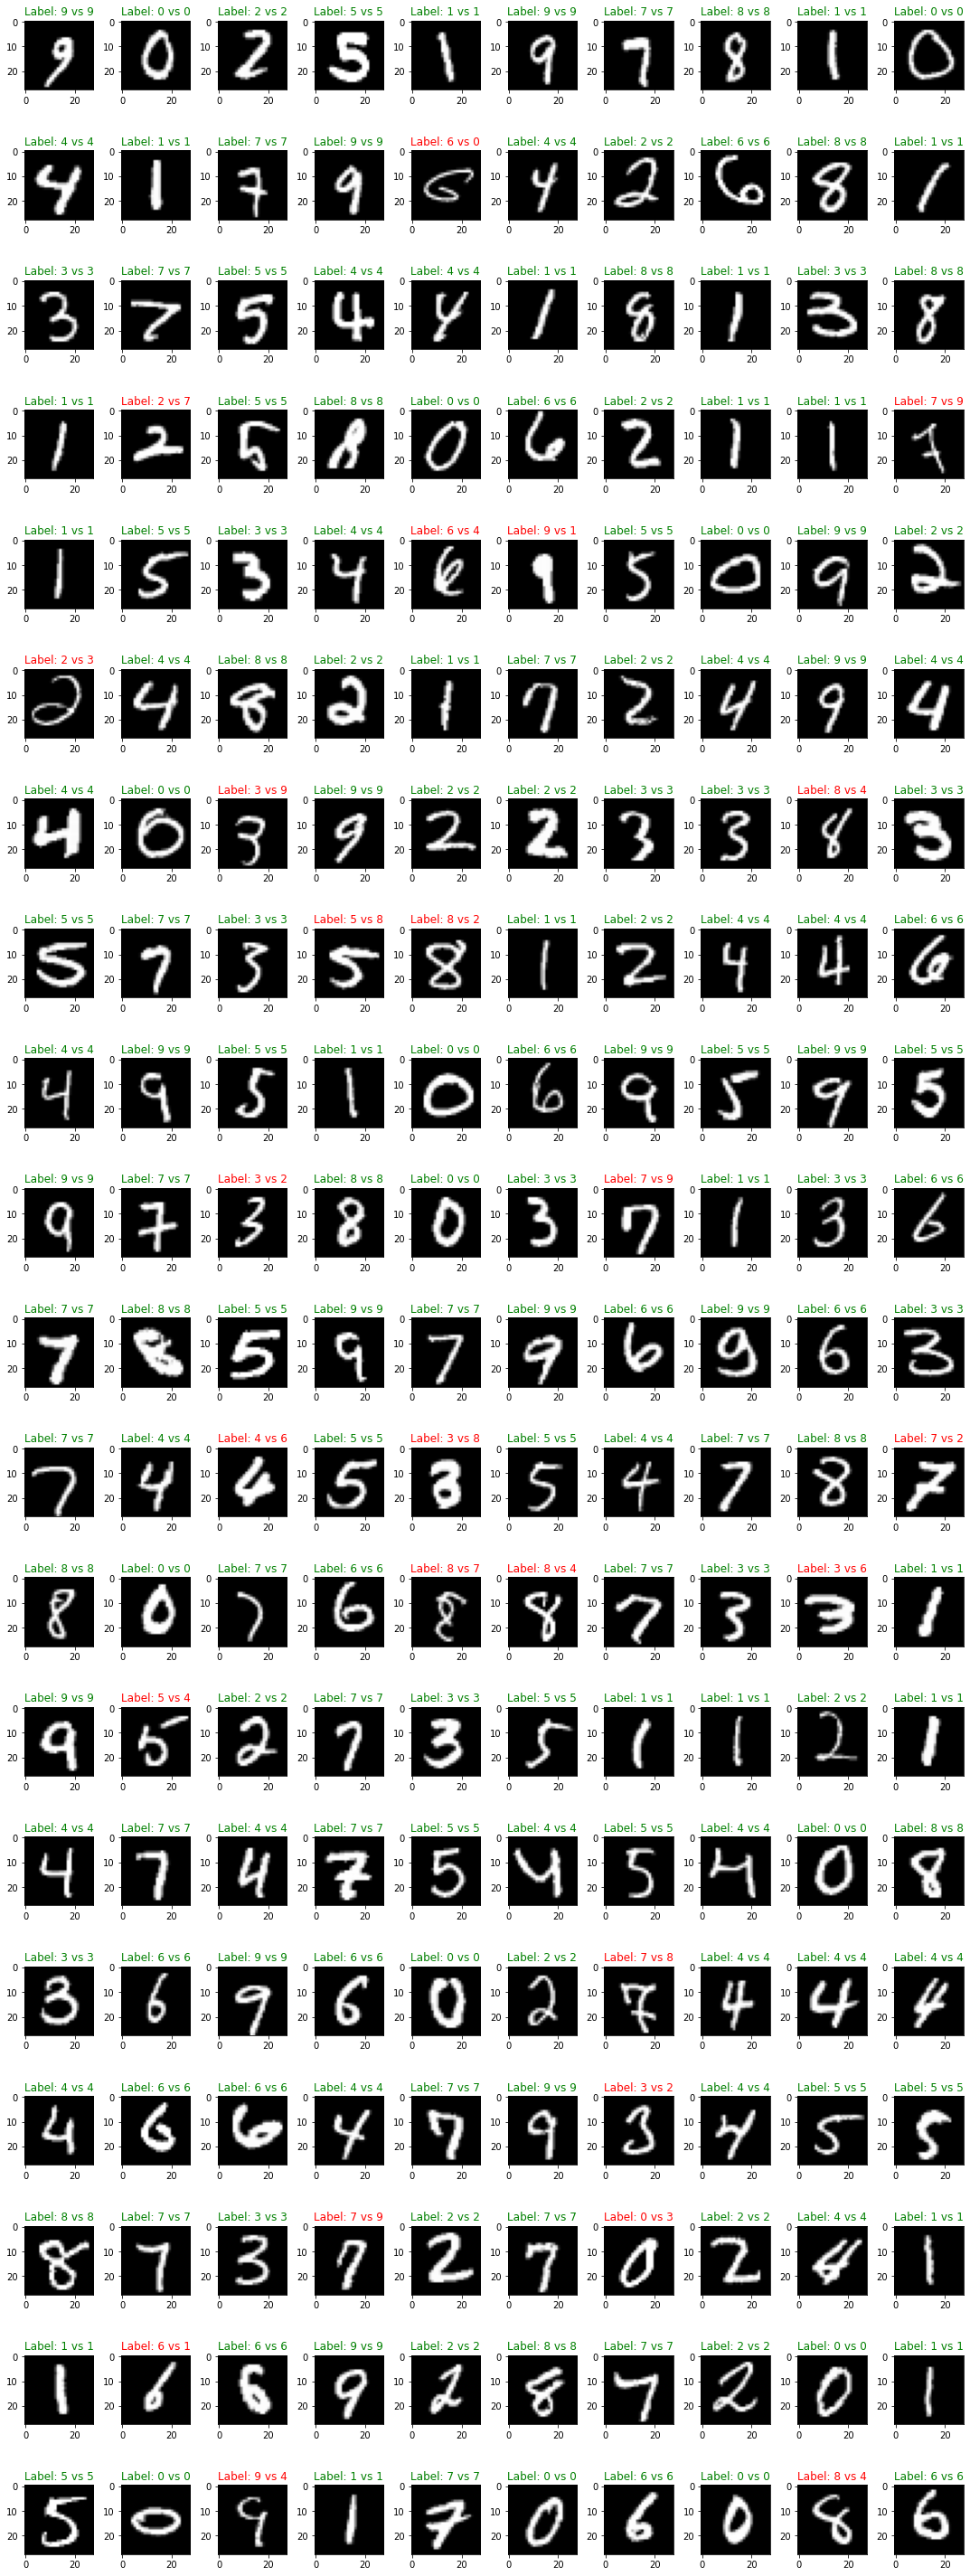

In [14]:
# visualize the result
cls.visualize()

In [15]:
# print prediction accuracy
cls.Test()

0.87